<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Выбросы-(оutliers)" data-toc-modified-id="Выбросы-(оutliers)-0.0.1"><span class="toc-item-num">0.0.1&nbsp;&nbsp;</span>Выбросы (оutliers)</a></span></li><li><span><a href="#one-hot-encoding" data-toc-modified-id="one-hot-encoding-0.0.2"><span class="toc-item-num">0.0.2&nbsp;&nbsp;</span>one-hot-encoding</a></span></li><li><span><a href="#46.-Ну-а-теперь-все-вместе.--(★★★★★★★★★★)" data-toc-modified-id="46.-Ну-а-теперь-все-вместе.--(★★★★★★★★★★)-0.0.3"><span class="toc-item-num">0.0.3&nbsp;&nbsp;</span><strong>46.</strong> Ну а теперь все вместе.  (★★★★★★★★★★)</a></span></li></ul></li></ul></li><li><span><a href="#Regular-expressions-with-Pandas" data-toc-modified-id="Regular-expressions-with-Pandas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Regular expressions with Pandas</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd

**1\.** Как создать pd.Series из листа, numpy array и словаря(dict)? (★☆☆)

In [2]:
mylist = list('abcedfghijklmnopqrstuvwxyz')
myarr = np.arange(26)
mydict = dict(zip(mylist, myarr))

#your code

s1 = pd.Series(mylist)
s2 = pd.Series(myarr)
s3 = pd.Series(mydict)

s1,s2,s3

(0     a
 1     b
 2     c
 3     e
 4     d
 5     f
 6     g
 7     h
 8     i
 9     j
 10    k
 11    l
 12    m
 13    n
 14    o
 15    p
 16    q
 17    r
 18    s
 19    t
 20    u
 21    v
 22    w
 23    x
 24    y
 25    z
 dtype: object,
 0      0
 1      1
 2      2
 3      3
 4      4
 5      5
 6      6
 7      7
 8      8
 9      9
 10    10
 11    11
 12    12
 13    13
 14    14
 15    15
 16    16
 17    17
 18    18
 19    19
 20    20
 21    21
 22    22
 23    23
 24    24
 25    25
 dtype: int32,
 a     0
 b     1
 c     2
 e     3
 d     4
 f     5
 g     6
 h     7
 i     8
 j     9
 k    10
 l    11
 m    12
 n    13
 o    14
 p    15
 q    16
 r    17
 s    18
 t    19
 u    20
 v    21
 w    22
 x    23
 y    24
 z    25
 dtype: int64)

**2\.** Как сделать превратить индексы из датафрейма в колонку? (★☆☆)

In [3]:
df=pd.DataFrame(['a', 'b', 'c'])

#your code

df.reset_index(inplace=True)
df

,index,0
0,0,a
1,1,b
2,2,c


**3\.** Как из нескольких pd.Series сделать один датафрейм? (★★☆)

(hint: pd.concat или словарь с колонками)

In [4]:
df1=pd.Series(['a', 'b', 'c'])
df2=pd.Series(['aa', 'b1', 'c2'])
df3=pd.Series(['44', '55', '66'])

#your code

df=pd.DataFrame(dict(df1 = df1, df2 = df2, df3 = df3))

df

,df1,df2,df3
0,a,aa,44
1,b,b1,55
2,c,c2,66


**4\.** Как получить строки из series A, которые не содержатся в series B? (★★☆)

In [5]:
df1=pd.Series(['a', 'b', 'c'])
df2=pd.Series(['a', 'b1', 'c2'])

#your code

pd.Series(list(set(df1)-set(df2)))

0    b
1    c
dtype: object

**5\.** Как получить из series/dataframe минимум, 25й персентиль, медиану, 75тый персентиль, максимум? (★☆☆)

(hint: использовать одну команду)

In [6]:
df1=pd.Series(np.arange(10, 99))

#your code

#np.percentile(df1, q=[0, 25, 50, 75, 100])

df1.describe()

count    89.000000
mean     54.000000
std      25.836021
min      10.000000
25%      32.000000
50%      54.000000
75%      76.000000
max      98.000000
dtype: float64

**6\.** Как получить частоту\долю для всех уникальных объектов в series? (★☆☆)

In [7]:
df1=pd.Series(['a', 'b', 'c', 'g', 'v', 'a', 'a', 'a', 'u', 'a', 'b', 'c', 'c'])

#your code
# доля в процентах
df1.nunique()/(len(df1)/100)

46.15384615384615

**7\.** Как оставить только топ-2 самых часто встречающихся значений, а все остальные значения заменить на 'other'?  (★★☆)

In [8]:
df1=pd.Series(['a', 'b', 'c', 'g', 'v', 'a', 'a', 'a', 'u', 'a', 'b', 'c', 'c'])

#your code


print('Top: ',df1.value_counts().sort_values(ascending=False).index[:2].to_list())


df1.loc[~df1.isin(df1.value_counts().sort_values(ascending=False).index[:2].to_list())]= 'other'   


df1

Top:  ['a', 'c']


0         a
1     other
2         c
3     other
4     other
5         a
6         a
7         a
8     other
9         a
10    other
11        c
12        c
dtype: object

**8\.** Как разбить колонку с числовыми значениями на 10 групп одинакового размера?  (★★☆)

(hint: pd.qcut)

In [9]:
s = pd.Series(np.random.random(20))

#your code

pd.qcut(s, q=10)

0                  (0.118, 0.199]
1     (0.08259999999999999, 0.11]
2                  (0.118, 0.199]
3                  (0.349, 0.513]
4                  (0.513, 0.657]
5                  (0.826, 0.875]
6                  (0.657, 0.728]
7                  (0.349, 0.513]
8                  (0.657, 0.728]
9                  (0.199, 0.349]
10                 (0.728, 0.761]
11                 (0.513, 0.657]
12                 (0.761, 0.826]
13                  (0.11, 0.118]
14    (0.08259999999999999, 0.11]
15                 (0.761, 0.826]
16                 (0.199, 0.349]
17                 (0.728, 0.761]
18                 (0.826, 0.875]
19                  (0.11, 0.118]
dtype: category
Categories (10, interval[float64]): [(0.08259999999999999, 0.11] < (0.11, 0.118] < (0.118, 0.199] < (0.199, 0.349] ... (0.657, 0.728] < (0.728, 0.761] < (0.761, 0.826] < (0.826, 0.875]]

**9\.** Как найти позиции чисел, которые делятся на 3 без остатка из series?  (★★☆)

(можно с помощью numpy и с помощью pandas)

In [10]:
s9=pd.Series([3,6,8,4,5,9,10])


res9=(s9 % 3 == 0)

res9.loc[res9].index.to_list()
      

[0, 1, 5]

**10\.** Как извлечь из series строки по индексам?  (★☆☆)

In [11]:
s = pd.Series(list('abcdefghijklmnopqrstuvwxyz'))
pos = [0, 4, 8, 14, 20]

#your code

s.iloc[pos]

0     a
4     e
8     i
14    o
20    u
dtype: object

**11\.** Как сделать stack двух series вертикально и горизонтально? (★☆☆)

(hint: pd.append, pd.concat)

In [12]:
s1 = pd.Series(range(5))
s2 = pd.Series(list('abcde'))

#your code

s11=pd.concat([s1,s2], axis=1)
s11_2 = s1.append(s2, ignore_index=True)

print('s11\n',s11)
print('s12\n',s11_2)

s11
    0  1
0  0  a
1  1  b
2  2  c
3  3  d
4  4  e
s12
 0    0
1    1
2    2
3    3
4    4
5    a
6    b
7    c
8    d
9    e
dtype: object


**12\.** Как получить позиции строк из series A из другого series B? (★☆☆)

(можно с помощью numpy и с помощью pandas)

In [13]:
s1 = pd.Series([10, 9, 6, 5, 3, 1, 12, 8, 13])
s2 = pd.Series([1, 3, 10, 13])

#your code

for i in range(len(s2)):          
    print(pd.Index(s1).get_loc(s2[i]))

5
4
0
8


**13\.** Как вычислить среднеквадратическую ошибку для истинных и предсказанных значений? (★★☆)

In [14]:
truth = pd.Series(range(10))
pred = pd.Series(range(10)) + np.random.random(10)

#your code

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(truth, pred)


print(MSE, np.square(truth - pred).mean())

0.29866994312615647 0.29866994312615647


**14\.** Как конвертировать каждый первый элемент строке в series в верхний регистр? (★★☆)

In [15]:
s = pd.Series(['how', 'to', 'kick', 'ass?'])

#your code


s.str.capitalize()

0     How
1      To
2    Kick
3    Ass?
dtype: object

**15\.** Как посчитать количество символов в каждой строке? (★★☆)

In [16]:
s = pd.Series(['how', 'to', 'kick', 'ass?'])

#your code

s.str.len()

0    3
1    2
2    4
3    4
dtype: int64

**16\.** Как преобразовать даты в виде строк в timeseries?  (★☆☆)

(hint: pd.to_datetime)

In [17]:
s = pd.Series(['01 Jan 2010', '02-02-2011', '20120303', '2013/04/04', '2014-05-05', '2015-06-06T12:20'])

#your code

pd.to_datetime(s)

0   2010-01-01 00:00:00
1   2011-02-02 00:00:00
2   2012-03-03 00:00:00
3   2013-04-04 00:00:00
4   2014-05-05 00:00:00
5   2015-06-06 12:20:00
dtype: datetime64[ns]

**17\.** Как получить день месяца, номер недели, день года и день недели из даты в виде строки? (★★☆)

In [18]:
s = pd.Series(['01 Jan 2010', '02-02-2011', '20120303', '2013/04/04', '2014-05-05', '2015-06-06T12:20'])

#your code

s=pd.to_datetime(s)
# Создаем новые колонки

day = s.dt.day
weekday = s.dt.dayofweek # определяем день недели
year_day = s.dt.dayofyear # определяем день недели
week=s.dt.weekofyear

print("Date: ", day  )

print("Week number: ",   week )

print("Day number of year: ",   year_day  )

print("Day of week: ",   weekday)

Date:  0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64
Week number:  0    53
1     5
2     9
3    14
4    19
5    23
dtype: int64
Day number of year:  0      1
1     33
2     63
3     94
4    125
5    157
dtype: int64
Day of week:  0    4
1    2
2    5
3    3
4    0
5    5
dtype: int64


**18\.** Как конвертировать дату из формата месяц-год в формат год-месяц-первое число? (★★☆)

(hint: .strftime('%Y-%m-%d'))

In [19]:
s = pd.Series(['Jan 2017', 'Feb 2019', 'Mar 2012'])

#your code

s=pd.to_datetime(s)

didx = pd.DatetimeIndex(s)
didx.strftime('%Y-%m-%d')

Index(['2017-01-01', '2019-02-01', '2012-03-01'], dtype='object')

**19\.** Как отфильтровать слова, содержащие не менее 2 гласных? (★★☆)

In [20]:
s = pd.Series(['Kitty', 'Cat', 'Plan', 'Python', 'Money'])

#your code

import re
s19 = s.str.count('a|e|i|o|u|y', re.IGNORECASE) >= 2
s[s19]

0     Kitty
3    Python
4     Money
dtype: object

**20\.** Заполните все пропущенные даты от минимальной до максимальной, значения при этом дожны быть равны предыдущей не пропущеной дате (★★★)

In [21]:
s = pd.Series([1,10,3,np.nan], index=pd.to_datetime(['2000-01-01', '2000-01-03', '2000-01-06', '2000-01-08']))

#your code

import datetime

s2 = pd.Series(dtype='float64')
start_date_dt = s[pd.to_datetime(['2000-01-01'])].index.to_list()[0]
end_date_dt = s[pd.to_datetime(['2000-01-08'])].index.to_list()[0]
date_list=s[start_date_dt:end_date_dt].index.to_list() 

print(start_date_dt,end_date_dt)

current_dt = start_date_dt

lag=0

while current_dt <= end_date_dt:    
    if current_dt in date_list:         
        if str(s[current_dt])!='nan':
            lag=s[current_dt]                
          
    s2[current_dt]=lag       
    current_dt += datetime.timedelta(days=1)
    
s=s2
s

2000-01-01 00:00:00 2000-01-08 00:00:00


2000-01-01     1.0
2000-01-02     1.0
2000-01-03    10.0
2000-01-04    10.0
2000-01-05    10.0
2000-01-06     3.0
2000-01-07     3.0
2000-01-08     3.0
dtype: float64

**21\.** Считайте файл из CSV-файла по строчно и добавьте считанные строки в датафрейм (файл data/BostonHousing.csv)?  (★★☆)

(hint: csv reader)

In [22]:
df= pd.read_csv('BostonHousing.csv')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


**22\.** Как изменить значения столбца при импорте csv в фрейм данных?
Импортируйте датасет с помощью pd.read_csv, но колонку 'medv' (median house value) измените так, что если value < 25 = ‘Low’ и если > 25 = ‘High’.  (★★☆)

(hint: pd.read_csv(....., converts={}))

In [23]:
def medv_conv(x):    
    m=''
    if float(x)<5:
        m="Low"
    elif float(x)>25:        
        m="High"
    else:
        m=str(x)
    return m    
        
         

df=pd.read_csv('BostonHousing.csv', converters={"medv": medv_conv})
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,High
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,High
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22


**23\.** Как импортировать только указанные столбцы('crim' и 'medv') и только n строк из CSV-файла?  (★☆☆)

In [24]:
df = pd.read_csv('BostonHousing.csv', usecols=['crim','medv'], nrows=30)

df

,crim,medv
0,0.00632,24.0
1,0.02731,21.6
2,0.02729,34.7
3,0.03237,33.4
4,0.06905,36.2
5,0.02985,28.7
6,0.08829,22.9
7,0.14455,27.1
8,0.21124,16.5
9,0.17004,18.9


**24\.** Как получить кол-во строк, кол-во столбцов, тип столбцов, кол-во столбцов с таким типом данных, итоговую статистику каждого столбца датафрейма?  (★☆☆)

In [25]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')


#  number of rows and columns
print('number of rows and columns: ', df.shape)
# datatypes
print("\n datatypes: ", df.dtypes)
# how many columns under each dtype
print('\n how many columns under each dtype:', len(list(df.select_dtypes(include=['object']).columns)))
# summary statistics
df.describe()

number of rows and columns:  (93, 27)

 datatypes:  Manufacturer           object
Model                  object
Type                   object
Min.Price             float64
Price                 float64
Max.Price             float64
MPG.city              float64
MPG.highway           float64
AirBags                object
DriveTrain             object
Cylinders              object
EngineSize            float64
Horsepower            float64
RPM                   float64
Rev.per.mile          float64
Man.trans.avail        object
Fuel.tank.capacity    float64
Passengers            float64
Length                float64
Wheelbase             float64
Width                 float64
Turn.circle           float64
Rear.seat.room        float64
Luggage.room          float64
Weight                float64
Origin                 object
Make                   object
dtype: object

 how many columns under each dtype: 9


,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
count,86.000000,91.000000,88.000000,84.000000,91.000000,91.000000,86.000000,90.000000,87.000000,85.000000,91.000000,89.000000,92.000000,87.000000,88.000000,89.000000,74.000000,86.000000
mean,17.118605,19.616484,21.459091,22.404762,29.065934,2.658242,144.000000,5276.666667,2355.000000,16.683529,5.076923,182.865169,103.956522,69.448276,38.954545,27.853933,13.986486,3104.593023
std,8.828290,9.724280,10.696563,5.841520,5.370293,1.045845,53.455204,605.554811,486.916616,3.375748,1.045953,14.792651,6.856317,3.778023,3.304157,3.018129,3.120824,600.129993
min,6.700000,7.400000,7.900000,15.000000,20.000000,1.000000,55.000000,3800.000000,1320.000000,9.200000,2.000000,141.000000,90.000000,60.000000,32.000000,19.000000,6.000000,1695.000000
25%,10.825000,12.350000,14.575000,18.000000,26.000000,1.800000,100.750000,4800.000000,2017.500000,14.500000,4.000000,174.000000,98.000000,67.000000,36.000000,26.000000,12.000000,2647.500000
50%,14.600000,17.700000,19.150000,21.000000,28.000000,2.300000,140.000000,5200.000000,2360.000000,16.500000,5.000000,181.000000,103.000000,69.000000,39.000000,27.500000,14.000000,3085.000000
75%,20.250000,23.500000,24.825000,25.000000,31.000000,3.250000,170.000000,5787.500000,2565.000000,19.000000,6.000000,192.000000,110.000000,72.000000,42.000000,30.000000,16.000000,3567.500000
max,45.400000,61.900000,80.000000,46.000000,50.000000,5.700000,300.000000,6500.000000,3755.000000,27.000000,8.000000,219.000000,119.000000,78.000000,45.000000,36.000000,22.000000,4105.000000


**25\.** Как извлечь номер строки и столбца конкретной ячейки с заданным критерием? (★☆☆)

In [26]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

# Get Manufacturer with highest price
print(df['Manufacturer'][df.loc[df['Max.Price']==df['Max.Price'].max()].index.to_list()].to_list())
# Get Row and Column number

s=(df == df['Max.Price'].max()).any()
a = s.index[s]

print(df.loc[df['Max.Price']==df['Max.Price'].max()].index.to_list(),df.columns.get_loc(a[0]))
# Get the value
print(df['Max.Price'].max())
 

['Mercedes-Benz']
[58] 5
80.0


**26\.** Переименнуйте колонку Type в CarType, в столбцах с '.' в названии замените её на '_'. Как добавить ко всем названиям колонок суффиксы?  (★☆☆)

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

#your code

df.rename(columns = {'Type':'CarType'}, inplace = True)

columns=df.columns.to_list()


for i in range(len(columns)):
    if columns[i].find('.')>1:
        df.rename(columns = {columns[i]:columns[i].replace('.','_')}, inplace = True)


print(df.columns.to_list())

['Manufacturer', 'Model', 'CarType', 'Min_Price', 'Price', 'Max_Price', 'MPG_city', 'MPG_highway', 'AirBags', 'DriveTrain', 'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev_per_mile', 'Man_trans_avail', 'Fuel_tank_capacity', 'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn_circle', 'Rear_seat_room', 'Luggage_room', 'Weight', 'Origin', 'Make']


**27\.** Проверьте есть ли в датафрейме пропуски? Если да, посчитайте кол-во nan\none в каждом столбце датафрейма  (★★☆)

In [28]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

#your code

df.isna().sum()

Manufacturer           4
Model                  1
Type                   3
Min.Price              7
Price                  2
Max.Price              5
MPG.city               9
MPG.highway            2
AirBags                6
DriveTrain             7
Cylinders              5
EngineSize             2
Horsepower             7
RPM                    3
Rev.per.mile           6
Man.trans.avail        5
Fuel.tank.capacity     8
Passengers             2
Length                 4
Wheelbase              1
Width                  6
Turn.circle            5
Rear.seat.room         4
Luggage.room          19
Weight                 7
Origin                 5
Make                   3
dtype: int64

**28\.** Как заменить отсутствующие значения нескольких числовых столбцов средним?  (★★☆)

In [29]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

#your code

df.fillna(df.mean())

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.900000,15.9,18.800000,25.0,31.0,None,Front,...,5.0,177.0,102.0,68.000000,37.0,26.5,13.986486,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.200000,33.9,38.700000,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.000000,38.0,30.0,15.000000,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.900000,29.1,32.300000,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.000000,37.0,28.0,14.000000,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,17.118605,37.7,44.600000,19.0,26.0,Driver & Passenger,NaN,...,6.0,193.0,106.0,69.448276,37.0,31.0,17.000000,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,17.118605,30.0,21.459091,22.0,30.0,NaN,Rear,...,4.0,186.0,109.0,69.000000,39.0,27.0,13.000000,3640.0,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,16.600000,19.7,22.700000,17.0,21.0,None,Front,...,7.0,187.0,115.0,72.000000,38.0,34.0,13.986486,3960.0,NaN,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,17.600000,20.0,22.400000,21.0,30.0,None,Front,...,5.0,180.0,103.0,67.000000,35.0,31.5,14.000000,2985.0,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,22.900000,23.3,23.700000,18.0,25.0,None,Front,...,4.0,159.0,97.0,66.000000,36.0,26.0,15.000000,2810.0,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,21.800000,22.7,23.500000,21.0,28.0,Driver only,Rear,...,5.0,190.0,104.0,67.000000,37.0,29.5,14.000000,2985.0,non-USA,Volvo 240


**29\.** Как выбрать конкретный столбец из датафрейма в качестве датафрейма, а не series?  (★☆☆)

In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

#your code

df[['Model']]

,Model
0,Integra
1,Legend
2,90
3,100
4,535i
...,...
88,Eurovan
89,Passat
90,Corrado
91,240


**30\.** Как изменить порядок столбцов данных? (☆☆☆)

In [31]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

#your code

cols =  df.columns.to_list()

df = df[cols[-1:] + cols[:-1]]

cols2 =  df.columns.to_list()

print('Поменяли первый столбец с последним \n 0 columns: ',cols[0],' \ ',cols2[0])

Поменяли первый столбец с последним 
 0 columns:  Manufacturer  \  Make


**31\.** Как установить количество строк и столбцов, отображаемых в выводе? (☆☆☆)

(hint: pd.set_option)

In [32]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

#your code

with pd.option_context('display.max_rows',10): # change number of rows accordingly
      with pd.option_context('display.max_columns',5): # change number of columns accordingly
            display(df)

,Manufacturer,Model,...,Origin,Make
0,Acura,Integra,...,non-USA,Acura Integra
1,NaN,Legend,...,non-USA,Acura Legend
2,Audi,90,...,non-USA,Audi 90
3,Audi,100,...,non-USA,Audi 100
4,BMW,535i,...,non-USA,BMW 535i
...,...,...,...,...,...
88,Volkswagen,Eurovan,...,NaN,Volkswagen Eurovan
89,Volkswagen,Passat,...,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,...,non-USA,Volkswagen Corrado
91,Volvo,240,...,non-USA,Volvo 240


**32\.** Как получить номер строки, в которой содержится максимальное значение в столбце? (★★☆)

In [33]:
df = pd.DataFrame(np.random.randint(1, 30, 30).reshape(10,-1), columns=list('abc'))

#your code

print(df.loc[df['a']==df['a'].max()].index.to_list())

print(df.loc[df['b']==df['b'].max()].index.to_list())

print(df.loc[df['c']==df['c'].max()].index.to_list())

df

[1]
[0]
[3]


,a,b,c
0,9,27,27
1,22,12,28
2,17,18,7
3,11,25,29
4,7,1,21
5,17,5,20
6,7,3,12
7,3,8,9
8,7,10,1
9,3,10,9


**33\.** Как получить последние n строк датафрейма с суммой строк 100?  (★★★)

In [34]:
df=pd.DataFrame({'id':[1,2,3,4,5,6,7],'money':[20,40,5,30,15,45,10]}).set_index('id')



for i in range(1,len(df)):
    if df['money'][-1*i:].sum()<100: 
        print('кол-во строк последних строк: ', i, "сумма: ", df['money'][-1*i:].sum())      

    else:
        print('кол-во строк последних строк: ', i, "сумма: ", df['money'][-1*i:].sum())    
        df=df[-1*i:]
        break
df

кол-во строк последних строк:  1 сумма:  10
кол-во строк последних строк:  2 сумма:  55
кол-во строк последних строк:  3 сумма:  70
кол-во строк последних строк:  4 сумма:  100


,money
id,
4,30
5,15
6,45
7,10


### Выбросы (оutliers)

* 5 Ways to Detect Outliers/Anomalies That Every Data Scientist Should Know (Python Code)

https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623

**34\.** Как найти и заменить выбросы из столбца Series или датафрейма? (★★★)

Замените все значения из столбца ниже 5того и больше 95го персентиля, на пограничные значения.

(hint: .quantile())

In [35]:
s = pd.Series(np.logspace(-2, 2, 30))

#your code

s[s<s.quantile(0.5)] = s.quantile(0.5)
s[s>s.quantile(0.95)] = s.quantile(0.95)

s
#quantil_05, quantil_95

0      1.012635
1      1.012635
2      1.012635
3      1.012635
4      1.012635
5      1.012635
6      1.012635
7      1.012635
8      1.012635
9      1.012635
10     1.012635
11     1.012635
12     1.012635
13     1.012635
14     1.012635
15     1.172102
16     1.610262
17     2.212216
18     3.039195
19     4.175319
20     5.736153
21     7.880463
22    10.826367
23    14.873521
24    20.433597
25    28.072162
26    38.566204
27    52.983169
28    63.876672
29    63.876672
dtype: float64

**35\.** Попробуйте реализовать метод Interquartile Range (IQR) (★★★)

Почитать про него можно по ссылке выше.

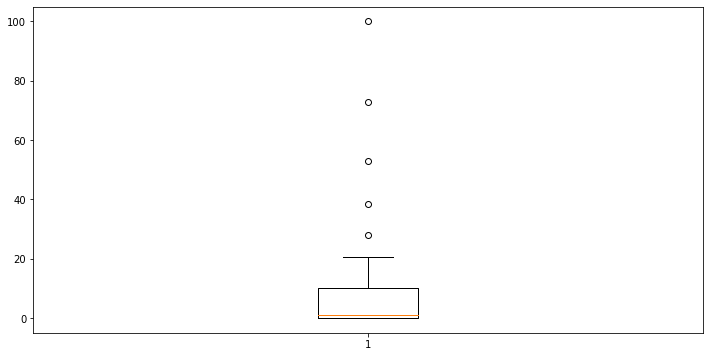

In [36]:
s = pd.Series(np.logspace(-2, 2, 30))

#your code
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12, 6))
plt.boxplot(s)
plt.show()

**36\.** Как поменять местами две строки данных? (★★★)

In [37]:
df = pd.DataFrame(np.arange(25).reshape(5, -1))

#your code
# поменяли строку с 1 индексом со стокой с 2 индексом
d = {1: 2, 2: 1}
df_final = df.rename(d).sort_index()

df_final

,0,1,2,3,4
0,0,1,2,3,4
1,10,11,12,13,14
2,5,6,7,8,9
3,15,16,17,18,19
4,20,21,22,23,24


In [38]:
df

,0,1,2,3,4
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19
4,20,21,22,23,24


### one-hot-encoding

**37\.** Как создать однозначные кодировки категориальной переменной? (★★★)

Сделайте one-hot кодировку столбца 'a'.

In [39]:
df = pd.DataFrame([['aa', 'kek'], ['ba', 'lol'], ['ab', 'kek'], ['aa', 'lol'], ['cc', 'kek']], columns=['a', 'b'])

#your code
df = pd.get_dummies(df, columns=['a'])
df

,b,a_aa,a_ab,a_ba,a_cc
0,kek,1,0,0,0
1,lol,0,0,1,0
2,kek,0,1,0,0
3,lol,1,0,0,0
4,kek,0,0,0,1


**38\.** Нормализуйте все столбцы в датафрейме. (★★★)

a) Нормализовать все столбцы df путем вычитания среднего значения столбца и деления на стандартное отклонение. 

b) Трансформируйте все столбцы df так, чтобы минимальное значение в каждом столбце было 0, а max = 1.

In [40]:
df = pd.DataFrame(np.random.randint(1,100, 80).reshape(8, -1))

#your code

standardized = (df - df.mean()) / df.std()
standardized

,0,1,2,3,4,5,6,7,8,9
0,0.474613,0.701680,-1.047381,-0.383563,1.099474,-1.271181,-0.034340,-0.600080,1.301351,1.720402
1,-0.221486,1.417488,0.686215,1.227402,-1.261162,0.620809,-0.819246,-1.406026,0.675565,-0.650126
2,-1.866811,-0.880632,-0.052168,0.153425,1.002462,-0.719350,-0.073585,-0.319750,-0.234670,-0.685507
3,0.063282,-1.445744,0.204661,-1.150689,0.420387,0.778475,-1.054718,0.696443,1.187572,0.199018
4,1.139071,0.023546,-0.854759,1.534252,0.711425,-0.679934,1.692455,0.591319,0.106668,-1.216222
5,0.759381,-0.729936,-0.148479,-0.997264,-0.743762,-0.955849,0.868303,-0.004380,-0.576008,1.154306
6,-0.980867,1.040747,2.002464,-0.728770,-1.390512,1.212056,0.554340,1.782718,-1.315573,0.022113
7,0.632817,-0.127150,-0.790552,0.345207,0.161687,1.014974,-1.133209,-0.740244,-1.144904,-0.543983


In [41]:
standardized_2=df.apply(lambda x: x/x.max(), axis=0)
standardized_2

,0,1,2,3,4,5,6,7,8,9
0,0.781250,0.802083,0.010417,0.358974,1.000000,0.112676,0.435897,0.313131,1.000000,1.000000
1,0.552083,1.000000,0.572917,0.897436,0.160920,0.788732,0.179487,0.080808,0.765957,0.202381
2,0.010417,0.364583,0.333333,0.538462,0.965517,0.309859,0.423077,0.393939,0.425532,0.190476
3,0.645833,0.208333,0.416667,0.102564,0.758621,0.845070,0.102564,0.686869,0.957447,0.488095
4,1.000000,0.614583,0.072917,1.000000,0.862069,0.323944,1.000000,0.656566,0.553191,0.011905
5,0.875000,0.406250,0.302083,0.153846,0.344828,0.225352,0.730769,0.484848,0.297872,0.809524
6,0.302083,0.895833,1.000000,0.243590,0.114943,1.000000,0.628205,1.000000,0.021277,0.428571
7,0.833333,0.572917,0.093750,0.602564,0.666667,0.929577,0.076923,0.272727,0.085106,0.238095


**39\.** Как получить конкретную группу из датафрейма сгруппированного по ключу? (★★★)

Сгруппируйте по 'name', и выведите данные по группе 'orange'.

(hint: groupby(), get_group())

In [42]:
df = pd.DataFrame({'name': ['apple', 'banana', 'orange'] * 3,
                   'taste': np.random.rand(9),
                   'price': np.random.randint(0, 15, 9)})

#your code

df.groupby(['name']).get_group('orange')

,name,taste,price
2,orange,0.984626,1
5,orange,0.438358,2
8,orange,0.553742,2


**40\.** Как вычислить среднее значение по столбцу 'price' по каждому фрукту в датафрейме и сохранить сгруппированный столбец как другой столбец (не индекс)? (★★★)

In [43]:
df = pd.DataFrame({'name': ['apple', 'banana', 'orange'] * 3,
                   'taste': np.random.rand(9),
                   'price': np.random.randint(0, 15, 9)})

#your code

df_mask=df['name']

df2=pd.DataFrame(df.groupby(['name'])['price'].mean())

df2.reset_index(inplace=True) 


for i in range(0,len(df2)):
    print(df2['name'].loc[i],df2['price'].loc[i])
    name_mask=df.name==df2['name'].loc[i]
    df_mask=df_mask.mask(name_mask, df2['price'].loc[i]) 

    

df['mean']=df_mask


df

apple 7.0
banana 5.333333333333333
orange 2.6666666666666665


,name,taste,price,mean
0,apple,0.557387,1,7
1,banana,0.982025,6,5.33333
2,orange,0.151456,2,2.66667
3,apple,0.831502,11,7
4,banana,0.272491,10,5.33333
5,orange,0.289493,1,2.66667
6,apple,0.375448,9,7
7,banana,0.144241,0,5.33333
8,orange,0.064095,5,2.66667


**41\.** Как объединить два датафрейма по двум столбцам, чтобы в них остались только общие строки?  (★★★)

Сделать merge двух датафреймов по колонкам ['fruit', 'weight'] и ['pazham', 'kilo'].

(hint: pd.merge https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html#merge )

In [44]:
df1 = pd.DataFrame({'fruit': ['apple', 'banana', 'orange'] * 3,
                    'weight': ['high', 'medium', 'low'] * 3,
                    'price': np.random.randint(0, 15, 9)})
df2 = pd.DataFrame({'pazham': ['apple', 'orange', 'pine'] * 2,
                    'kilo': ['high', 'low'] * 3,
                    'price': np.random.randint(0, 15, 6)})

#your code

merged=df1.merge(df2, left_on = ['fruit', 'weight'], right_on = ['pazham', 'kilo'], how = 'inner')


#zoo.merge(zoo_eats, how='outer')

merged

,fruit,weight,price_x,pazham,kilo,price_y
0,apple,high,7,apple,high,6
1,apple,high,13,apple,high,6
2,apple,high,14,apple,high,6
3,orange,low,11,orange,low,2
4,orange,low,9,orange,low,2
5,orange,low,11,orange,low,2


**42\.** Как удалить строки из датафрейма А, которые присутствуют в датафрейме B? (★★★)


In [45]:
df1 = pd.DataFrame({'fruit': ['apple', 'orange', 'banana'] * 3,
                    'weight': ['high', 'medium', 'low'] * 3,
                    'price': np.arange(9)})

df2 = pd.DataFrame({'fruit': ['apple', 'orange', 'pine'] * 2,
                    'weight': ['high', 'medium'] * 3,
                    'price': np.arange(6)})

#your code



df2_list=[]
list_drop=[]

for i in range(0,len(df2)):
    df2_list.append(df2.loc[i].to_list())
    
for k in range(0,len(df2)):
    if df1.loc[k].to_list()==df2_list[k]:  
        list_drop.append(k)
        #print(k,df1.loc[k].to_list(),df2_list[k])
    
df1=df1.drop(list_drop)

# или такой метод
#df1.merge(df2,how='cross')

**43\.** Как получить номера строк, в которых совпадают значения двух столбцов? (★★★)

(hint: np.where)

In [46]:
df = pd.DataFrame({'fruit1': np.random.choice(['apple', 'orange', 'banana'], 10),
                    'fruit2': np.random.choice(['apple', 'orange', 'banana'], 10)})


#your code

print(df[df.nunique(1).eq(1)].index.to_list())

print(df.where(df['fruit1'] == df['fruit2']).dropna().index.to_list())

df

[0, 1, 4]
[0, 1, 4]


,fruit1,fruit2
0,banana,banana
1,apple,apple
2,banana,apple
3,apple,banana
4,orange,orange
5,apple,banana
6,banana,apple
7,orange,banana
8,banana,apple
9,apple,orange


**44\.** Создайте столбец a_shift со сдвигом на одну строку назад. (★★★)

(hint: .shift())

In [47]:
df = pd.DataFrame(np.random.randint(1, 100, 20).reshape(-1, 4), columns = list('abcd'))

#your code

past_lags = 1

for lag in range(past_lags):
    df[f"a_lag_{lag+1}"] = df['a'].shift(lag+1)

df

,a,b,c,d,a_lag_1
0,50,67,8,41,NaN
1,72,33,79,8,50.0
2,41,48,14,55,72.0
3,34,71,44,62,41.0
4,95,22,82,5,34.0


**45\.** Как разбить текстовый столбец на три отдельных столбца? (★★★)

Разбить на три столбцы STD, City, State

In [48]:
df = pd.DataFrame(["STD, City    State",
"33, Kolkata    West Bengal",
"44, Chennai    Tamil Nadu",
"40, Hyderabad    Telengana",
"80, Bangalore    Karnataka"], columns=['row'])

#your code

df = df['row'].str.split(',',expand=True)

df.columns=['row_1','row_2']

df2 = df['row_2'].str.split('    ',expand=True)

df2.columns=['row_3','row_3']

df=df.drop('row_2', axis=1)

df=df.merge(df2, left_index=True, right_index=True, how='left')

df

,row_1,row_3,row_3
0,STD,City,State
1,33,Kolkata,West Bengal
2,44,Chennai,Tamil Nadu
3,40,Hyderabad,Telengana
4,80,Bangalore,Karnataka


### **46\.** Ну а теперь все вместе.  (★★★★★★★★★★)

* Заменяем все точки в названии на '_'
* Выделить категориальные признаки
* Посчитать кол-во уникальных значений во всех текстовых\категориальных столбцах. 
* Колонки с только уникальными значениями удаляем (например Model и Make)
* Для столбцов у которых значений более 10, оставляем топ 10 значений, остальные заменяем на 'other'
* Числовые столбцы проверяем на пропуски. Подсчитываем кол-во nan\none и делим на размер датафрейма -сохраняем в отдельный датафрейм, это доля пропусков в каждом столбце
* Чистим выбросы. Во всех числовых столбцах заменяем все значения столбца меньше 5го персентиля и больше 95ого персентиля на эти пограничные значения.
* Заполняем пропуски в числовых столбцах на среднее по столбцу, в текстовых столбцах на 'other'
* Все категориальные признаки превращаем в one-hot-encoding
* Создать новый столбец Length_Width = Length * Width
* Столбцы MPG_cityми MPG_highway из MPG перевести в единицы LPG (литры \100 км) = (100 * 3,785)  / (MPG * 1,609)
* Посчитать среднюю цену по каждому типу машины у каждого производителя
* Посчитать максимальные Length и Width по Type
* Посчитать кол-во моделей машин по типу машины и наличию подушки безопасности (агрегирование по столбцам Type и AirBags)
* Посчитать кол-во машин по каждому типу машины у каждого производителя(агрегирование по столбцам Type и Manufacturer)
* Посчитать кол-во машин по Manufacturer-Man_trans_avail
* Вывести у какой модели, какого изготовителя максимальная вместимость по пассажирам

In [49]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

# Все задания выполнены

In [50]:
# Заменяем все точки в названии на '_'

print("\n Заменяем все точки в названии на '_'\n")

columns=df.columns.to_list()


for i in range(len(columns)):
    if columns[i].find('.')>1:
        df.rename(columns = {columns[i]:columns[i].replace('.','_')}, inplace = True)
print(df.columns.to_list())          


 Заменяем все точки в названии на '_'

['Manufacturer', 'Model', 'Type', 'Min_Price', 'Price', 'Max_Price', 'MPG_city', 'MPG_highway', 'AirBags', 'DriveTrain', 'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev_per_mile', 'Man_trans_avail', 'Fuel_tank_capacity', 'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn_circle', 'Rear_seat_room', 'Luggage_room', 'Weight', 'Origin', 'Make']


In [51]:
# Выделить категориальные признаки
print('\n Выделить категориальные признаки\n')
categor = list(df.select_dtypes(include=['object']).columns)
print(categor)


 Выделить категориальные признаки

['Manufacturer', 'Model', 'Type', 'AirBags', 'DriveTrain', 'Cylinders', 'Man_trans_avail', 'Origin', 'Make']


In [52]:
# Посчитать кол-во уникальных значений во всех текстовых\категориальных столбцах. 
print('\n Посчитать кол-во уникальных значений во всех текстовых\категориальных столбцах.\n')
drop_list=[] #Для задания: Колонки с только уникальными значениями удаляем (например Model и Make)
top_10=[] #Для задания: Для столбцов у которых значений более 10, оставляем топ 10 значений, остальные заменяем на 'other'
for i in range(len(categor)):
    print(categor[i],df[categor[i]].nunique())
    if df[categor[i]].nunique()==df[categor[i]].count():
        drop_list.append(categor[i])
       
    elif df[categor[i]].nunique()>10:
        top_10.append(categor[i])


 Посчитать кол-во уникальных значений во всех текстовых\категориальных столбцах.

Manufacturer 31
Model 92
Type 6
AirBags 3
DriveTrain 3
Cylinders 6
Man_trans_avail 2
Origin 2
Make 90


In [53]:
#Числовые столбцы проверяем на пропуски. 
#Подсчитываем кол-во nan\none и делим на размер датафрейма -сохраняем в отдельный датафрейм, это доля пропусков в каждом столбце

nan_=[]
nan_index=[]

columns=df.columns.to_list()
for g in range(len(columns)): 
    if columns[g] in categor:        
        continue
    else:
        nan_.append(round((df[columns[g]].isnull().sum(axis=0))/len(df),5))
        nan_index.append(columns[g])
        
df_nan = pd.DataFrame(nan_,index =nan_index,columns=['nan/df'])   

df_nan

,nan/df
Min_Price,0.07527
Price,0.02151
Max_Price,0.05376
MPG_city,0.09677
MPG_highway,0.02151
EngineSize,0.02151
Horsepower,0.07527
RPM,0.03226
Rev_per_mile,0.06452
Fuel_tank_capacity,0.08602


In [54]:
# Заполняем пропуски в числовых столбцах на среднее по столбцу, в текстовых столбцах на 'other'

categor = list(df.select_dtypes(include=['object']).columns)

for i in range(len(categor)):
    df[categor[i]].fillna("other", inplace = True)

df=df.fillna(df.mean())  

In [55]:
print('\n Максимальный Length по Type \n',df.groupby(['Type'])['Length'].max())
print('\n Максимальный Width по Type \n',df.groupby(['Type'])['Width'].max())  
print('\n Посчитать среднюю цену по каждому типу машины у каждого производителя \n',df.groupby(['Manufacturer','Type'])['Price'].mean())  
print('\n Посчитать кол-во моделей машин по типу машины и наличию подушки безопасности (агрегирование по столбцам Type и AirBags) \n',df.groupby(['Type','AirBags'])['Model'].count())
print('\n Посчитать кол-во машин по каждому типу машины у каждого производителя(агрегирование по столбцам Type и Manufacturer) \n',df.groupby(['Manufacturer','Type'])['Model'].count())
print('\n Посчитать кол-во машин по Manufacturer-Man_trans_avail \n',df.groupby(['Manufacturer','Man_trans_avail'])['Model'].count())
print('\n Вывести у какой модели, какого изготовителя максимальная вместимость по пассажирам \n',df.groupby(['Manufacturer','Model'])['Passengers'].max().sort_values(ascending=False).index[0])       


 Максимальный Length по Type 
 Type
Compact    190.0
Large      219.0
Midsize    205.0
Small      177.0
Sporty     193.0
Van        194.0
other      196.0
Name: Length, dtype: float64

 Максимальный Width по Type 
 Type
Compact    69.000000
Large      78.000000
Midsize    74.000000
Small      69.448276
Sporty     74.000000
Van        78.000000
other      75.000000
Name: Width, dtype: float64

 Посчитать среднюю цену по каждому типу машины у каждого производителя 
 Manufacturer  Type   
Acura         Small      15.900000
Audi          Compact    29.100000
              Midsize    37.700000
BMW           Midsize    30.000000
Buick         Large      22.250000
                           ...    
Volkswagen    Sporty     23.300000
              Van        19.700000
Volvo         Compact    22.700000
other         Large      18.400000
              Midsize    31.933333
Name: Price, Length: 80, dtype: float64

 Посчитать кол-во моделей машин по типу машины и наличию подушки безопасности (агр

In [56]:
# Чистим выбросы. Во всех числовых столбцах заменяем все значения столбца меньше 5го персентиля и больше 95ого персентиля на эти пограничные значения.

columns=df.columns.to_list()
for q in range(len(columns)): 
    if columns[q] in categor:        
        continue
    else:                
        q_95=round(df[columns[q]].quantile(0.95),5)
        q_05=round(df[columns[q]].quantile(0.5),5)        
        df[columns[q]][df[columns[q]]<q_05] = q_05
        df[columns[q]][df[columns[q]]>q_95] = q_95
        
        
      
        print(columns[q],q_05,q_95)
        

Min_Price 14.9 34.48
Price 18.4 36.74
Max_Price 21.0 38.16
MPG_city 22.0 31.4
MPG_highway 28.0 37.4
EngineSize 2.4 4.6
Horsepower 142.0 237.0
RPM 5276.66667 6000.0
Rev_per_mile 2355.0 3264.0
Fuel_tank_capacity 16.68353 21.1
Passengers 5.0 7.0
Length 182.86517 205.4
Wheelbase 103.0 115.0
Width 69.0 75.8
Turn_circle 39.0 44.0
Rear_seat_room 27.85393 32.3
Luggage_room 13.98649 18.4
Weight 3104.59302 3976.0


<ipython-input-56-8da2007ee854>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns[q]][df[columns[q]]<q_05] = q_05
<ipython-input-56-8da2007ee854>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns[q]][df[columns[q]]>q_95] = q_95


In [57]:
#Создать новый столбец Length_Width = Length * Width
print('\nСоздать новый столбец Length_Width = Length * Width\n')

df['Length_Width']=df['Width']*df['Length']

print(df['Length_Width'][:10])


#Столбцы MPG_cityми MPG_highway из MPG перевести в единицы LPG (литры \100 км) = (100 * 3,785)  / (MPG * 1,609)

print('\nСтолбцы MPG_cityми MPG_highway из MPG перевести в единицы LPG\n')

df['LPG_city'] = (100 * 3.785)/(df['MPG_city'] * 1.609)
df['LPG_highway'] = (100 * 3.785)/(df['MPG_highway'] * 1.609)

df=df.drop(['MPG_city','MPG_highway'], axis=1)

print(df['LPG_city'][:10])

print(df['LPG_highway'][:10])


Создать новый столбец Length_Width = Length * Width

0    12617.696730
1    13845.000000
2    12617.696730
3    13403.517241
4    12834.000000
5    13041.000000
6    14800.000000
7    15569.320000
8    13750.758621
9    14994.200000
Name: Length_Width, dtype: float64

Столбцы MPG_cityми MPG_highway из MPG перевести в единицы LPG

0     9.409571
1    10.692695
2    10.692695
3    10.692695
4    10.692695
5    10.692695
6    10.692695
7    10.692695
8    10.692695
9    10.692695
Name: LPG_city, dtype: float64
0    7.588364
1    8.401403
2    8.401403
3    8.401403
4    7.841309
5    7.588364
6    8.401403
7    8.401403
8    8.401403
9    8.401403
Name: LPG_highway, dtype: float64


In [58]:
# Колонки с только уникальными значениями удаляем (например Model и Make)        
print('\nКолонки с только уникальными значениями удаляем \n',drop_list)    

df=df.drop(drop_list, axis=1)


Колонки с только уникальными значениями удаляем 
 ['Model', 'Make']


In [59]:
# Для столбцов у которых (видимо уникальных) значений более 10, оставляем топ 10 значений, остальные заменяем на 'other' 

print('\nДля столбцов у которых значений более 10, оставляем топ 10 значений, остальные заменяем на "other" \n',top_10)

for j in range(len(top_10)):    
    
    print('Top: ',[top_10[j]],df[top_10[j]].value_counts().sort_values(ascending=False).index[:10].to_list())   
    df[top_10[j]].loc[~df[top_10[j]].isin(df[top_10[j]].value_counts().sort_values(ascending=False).index[:10].to_list())] = 'other'

    
    
df['Manufacturer']


Для столбцов у которых значений более 10, оставляем топ 10 значений, остальные заменяем на "other" 
 ['Manufacturer']
Top:  ['Manufacturer'] ['Ford', 'Chevrolet', 'Dodge', 'Pontiac', 'Mazda', 'Toyota', 'other', 'Oldsmobile', 'Nissan', 'Volkswagen']


C:\Users\1661322\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0          other
1          other
2          other
3          other
4          other
         ...    
88    Volkswagen
89    Volkswagen
90    Volkswagen
91         other
92         other
Name: Manufacturer, Length: 93, dtype: object

In [60]:
# Все категориальные признаки превращаем в one-hot-encoding        

columns=df.columns.to_list()
categor = list(df.select_dtypes(include=['object']).columns)
df = pd.get_dummies(df, columns=categor)
print('\n Колнки с категориальными признаками: \n',categor)
print('\nВсе колнки после one-hot-encoding :\n', df.columns.to_list())


 Колнки с категориальными признаками: 
 ['Manufacturer', 'Type', 'AirBags', 'DriveTrain', 'Cylinders', 'Man_trans_avail', 'Origin']

Все колнки после one-hot-encoding :
 ['Min_Price', 'Price', 'Max_Price', 'EngineSize', 'Horsepower', 'RPM', 'Rev_per_mile', 'Fuel_tank_capacity', 'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn_circle', 'Rear_seat_room', 'Luggage_room', 'Weight', 'Length_Width', 'LPG_city', 'LPG_highway', 'Manufacturer_Chevrolet', 'Manufacturer_Dodge', 'Manufacturer_Ford', 'Manufacturer_Mazda', 'Manufacturer_Nissan', 'Manufacturer_Oldsmobile', 'Manufacturer_Pontiac', 'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_other', 'Type_Compact', 'Type_Large', 'Type_Midsize', 'Type_Small', 'Type_Sporty', 'Type_Van', 'Type_other', 'AirBags_Driver & Passenger', 'AirBags_Driver only', 'AirBags_None', 'AirBags_other', 'DriveTrain_4WD', 'DriveTrain_Front', 'DriveTrain_Rear', 'DriveTrain_other', 'Cylinders_3', 'Cylinders_4', 'Cylinders_5', 'Cylinders_6', 'Cylinders_

In [61]:
df

,Min_Price,Price,Max_Price,EngineSize,Horsepower,RPM,Rev_per_mile,Fuel_tank_capacity,Passengers,Length,...,Cylinders_6,Cylinders_8,Cylinders_other,Cylinders_rotary,Man_trans_avail_No,Man_trans_avail_Yes,Man_trans_avail_other,Origin_USA,Origin_non-USA,Origin_other
0,14.900000,18.40,21.000000,2.400000,142.0,6000.00000,2890.0,16.68353,5.0,182.86517,...,0,0,0,0,0,1,0,0,1,0
1,29.200000,33.90,38.160000,3.200000,200.0,5500.00000,2355.0,18.00000,5.0,195.00000,...,1,0,0,0,0,1,0,0,1,0
2,25.900000,29.10,32.300000,2.800000,172.0,5500.00000,2355.0,16.90000,5.0,182.86517,...,1,0,0,0,0,1,0,0,1,0
3,17.118605,36.74,38.160000,2.658242,172.0,5500.00000,2535.0,21.10000,6.0,193.00000,...,1,0,0,0,0,0,1,0,1,0
4,17.118605,30.00,21.459091,3.500000,208.0,5700.00000,2545.0,21.10000,5.0,186.00000,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,16.600000,19.70,22.700000,2.500000,142.0,5276.66667,2915.0,21.10000,7.0,187.00000,...,0,0,0,0,0,1,0,0,0,1
89,17.600000,20.00,22.400000,2.400000,142.0,5800.00000,2685.0,18.50000,5.0,182.86517,...,0,0,0,0,0,1,0,0,1,0
90,22.900000,23.30,23.700000,2.800000,178.0,5800.00000,2385.0,18.50000,5.0,182.86517,...,1,0,0,0,0,1,0,0,1,0
91,21.800000,22.70,23.500000,2.400000,142.0,5400.00000,2355.0,16.68353,5.0,190.00000,...,0,0,1,0,0,1,0,0,1,0


**47\.** Перевести индексы первого и третьего уровня в колонки

In [62]:
df = pd.DataFrame({
    'school_code': ['s001','s002','s003','s001','s002','s004'],
    'class': ['V', 'V', 'VI', 'VI', 'V', 'VI'],
    'name': ['Alberto Franco','Gino Mcneill','Ryan Parkes', 'Eesha Hinton', 'Gino Mcneill', 'David Parkes'],
    'date_of_birth': ['15/05/2002','17/05/2002','16/02/1999','25/09/1998','11/05/2002','15/09/1997'],
    'weight': [35, 32, 33, 30, 31, 32],
    't_id': ['t1', 't2', 't3', 't4', 't5', 't6']})
df1 = df.set_index(['t_id', 'school_code', 'class'])

df1 = df1.reset_index() 

df1

,t_id,school_code,class,name,date_of_birth,weight
0,t1,s001,V,Alberto Franco,15/05/2002,35
1,t2,s002,V,Gino Mcneill,17/05/2002,32
2,t3,s003,VI,Ryan Parkes,16/02/1999,33
3,t4,s001,VI,Eesha Hinton,25/09/1998,30
4,t5,s002,V,Gino Mcneill,11/05/2002,31
5,t6,s004,VI,David Parkes,15/09/1997,32


**48\.** Вывести строку из Series и DataFrame по заданному индексу

In [63]:
ds = pd.Series([1,3,5,7,9,11,13,15], index=[0,1,2,3,4,5,7,8])
df = pd.DataFrame({
    'school_code': ['s001','s002','s003','s001','s002','s004'],
    'class': ['V', 'V', 'VI', 'VI', 'V', 'VI'],
    'name': ['Alberto Franco','Gino Mcneill','Ryan Parkes', 'Eesha Hinton', 'Gino Mcneill', 'David Parkes'],
    'date_of_birth': ['15/05/2002','17/05/2002','16/02/1999','25/09/1998','11/05/2002','15/09/1997'],
    'weight': [35, 32, 33, 30, 31, 32]})

indx = 4

ds[[indx]]

4    9
dtype: int64

In [64]:
df.iloc[[indx]]

,school_code,class,name,date_of_birth,weight
4,s002,V,Gino Mcneill,11/05/2002,31


**49\.** Найти индексы строк с пропущенными данными

In [65]:
df = pd.DataFrame({
    'school_code': ['s001','s002','s003','s001','s002','s004'],
    'class': ['V', 'V', 'VI', 'VI', 'V', 'VI'],
    'name': ['Alberto Franco','Gino Mcneill','Ryan Parkes', 'Eesha Hinton', 'Gino Mcneill', 'David Parkes'],
    'date_of_birth': ['15/05/2002','17/05/2002','16/02/1999','25/09/1998','11/05/2002','15/09/1997'],
    'weight': [35, None, 33, 30, 31, None]},
     index = ['t1', 't2', 't3', 't4', 't5', 't6'])

bool_series = pd.isnull(df['weight']) 
df[bool_series].index.to_list()

['t2', 't6']

**50\.** Сделать left join датафреймов

In [66]:
data1 = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'P': ['P0', 'P1', 'P2', 'P3'],
                     'Q': ['Q0', 'Q1', 'Q2', 'Q3']}) 
data2 = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'R': ['R0', 'R1', 'R2', 'R3'],
                      'S': ['S0', 'S1', 'S2', 'S3']})

data3=data1.join(data2, on=None, how='left', lsuffix='_data1', rsuffix='_data2', sort=False) 

data3

,key1_data1,key2_data1,P,Q,key1_data2,key2_data2,R,S
0,K0,K0,P0,Q0,K0,K0,R0,S0
1,K0,K1,P1,Q1,K1,K0,R1,S1
2,K1,K0,P2,Q2,K1,K0,R2,S2
3,K2,K1,P3,Q3,K2,K0,R3,S3


**51\.** Соединить два датафрейма

In [67]:
data1 = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                      'B': ['B0', 'B1', 'B2']},
                     index=['K0', 'K1', 'K2'])

data2 = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                     index=['K0', 'K2', 'K3'])

data3=data1.merge(data2, left_index=True, right_index=True, how='left')

data3

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


**52\.** Сгруппировать датафрейм по полям 'customer_id' и 'salesman_id' и отсортировать по sum of purch_amt внутри каждой группы

In [68]:
df = pd.DataFrame({
'ord_no':[70001,70009,70002,70004,70007,70005,70008,70010,70003,70012,70011,70013],
'purch_amt':[150.5,270.65,65.26,110.5,948.5,2400.6,5760,1983.43,2480.4,250.45, 75.29,3045.6],
'ord_date': ['2012-10-05','2012-09-10','2012-10-05','2012-08-17','2012-09-10','2012-07-27','2012-09-10','2012-10-10','2012-10-10','2012-06-27','2012-08-17','2012-04-25'],
'customer_id':[3001,3001,3005,3001,3005,3001,3005,3001,3005,3001,3005,3005],
'salesman_id': [5002,5005,5001,5003,5002,5001,5001,5006,5003,5002,5007,5001]})

In [69]:
df.groupby(['customer_id','salesman_id'])['purch_amt'].sum().sort_values()


customer_id  salesman_id
3005         5007             75.29
3001         5003            110.50
             5005            270.65
             5002            400.95
3005         5002            948.50
3001         5006           1983.43
             5001           2400.60
3005         5003           2480.40
             5001           8870.86
Name: purch_amt, dtype: float64

**53\.** Сгруппировать датафрейм по месяцу и году из даты ord_date и найти общее количество заказов по годам и по месяцам

In [70]:
df = pd.DataFrame({
'ord_no':[70001,70009,70002,70004,70007,70005,70008,70010,70003,70012,70011,70013],
'purch_amt':[150.5,270.65,65.26,110.5,948.5,2400.6,5760,1983.43,2480.4,250.45, 75.29,3045.6],
'ord_date': ['05-10-2012','09-10-2012','05-10-2013','08-17-2013','10-09-2013','07-27-2014','10-09-2012','10-10-2012','10-10-2012','06-17-2014','07-08-2012','04-25-2012'],
'customer_id':[3001,3001,3005,3001,3005,3001,3005,3001,3005,3001,3005,3005],
'salesman_id': [5002,5005,5001,5003,5002,5001,5001,5006,5003,5002,5007,5001]})

In [71]:
df['ord_date'] = pd.to_datetime(df['ord_date'], infer_datetime_format = True)

# Создаем новые колонки
df['year'] = df['ord_date'].dt.year
df['month'] = df['ord_date'].dt.month

df.groupby(['month','year'])['ord_no'].count()

month  year
4      2012    1
5      2012    1
       2013    1
6      2014    1
7      2012    1
       2014    1
8      2013    1
9      2012    1
10     2012    3
       2013    1
Name: ord_no, dtype: int64

# Regular expressions with Pandas

**1\.** Выделить в отдельную колонку event_id первую цифру в кавычках, во вторую колонку event_probability вероятность (★☆☆) 

In [72]:
df=pd.DataFrame({'col1':["{'34': 0.9839372122311848}",
                         "{'77': 0.6724645988404411}",
                         "{'77': 0.6491011266207006}",
                         "{'77': 0.6123085784265466}",
                         "{'34': 0.87}",
                         "{'77': 0.6225699652019304}",
                         "{'3': 0.5470808226524633}",
                         "{'77': 0.6233849004135044}",
                         "{'77': 0.7050888998743866}",
                         "{'52': 0.8945052223205372}"]})

#your code



#your code


df['col1']=df['col1'].str.replace("}", '', regex=True).replace("{", '', regex=True).replace("'", '', regex=True)
df = df['col1'].str.split(':',expand=True)
df.columns=['event_id','event_probability']
df['event_id'] = df['event_id'].str[0]
df

,event_id,event_probability
0,3,0.9839372122311848
1,7,0.6724645988404411
2,7,0.6491011266207006
3,7,0.6123085784265466
4,3,0.87
5,7,0.6225699652019304
6,3,0.5470808226524633
7,7,0.6233849004135044
8,7,0.7050888998743866
9,5,0.8945052223205372


In [73]:
import re

**2\.** Удалите все тэги, переносы строк из текстов новостей (★★★)

(hint: df.column.str())

In [74]:
df = pd.read_excel('news.xlsx')

#your code

# УДАЛЕНИЕ переноса строк
df=df['text'].str.replace('\n','')

# удаление всех тегов
for i in range(len(df)):
    count=df[i].count('>') 
    k=0
    while k<count:
        k+=1        
        df[i]=df[i][:df[i].find('<')]+df[i][df[i].find('>')+1:]
    df[i]=re.sub(r'\s+', ' ', df[i])        

     

        
df[1]        

' НИЖНИЙ НОВГОРОД, 3 декабря 2019, 22:41 - REGNUM Бывший глава муниципального казенного учреждения " Главное управление по строительству и ремонту метрополитена, мостов и дорожных сетей в Нижнем Новгороде" ( ГУММиД ) Юрий Гаранин объявлен в розыск. В его отношении возбуждено уголовное дело по п. "в" ч. 3 ст. 286 УК РФ ("Превышение должностных полномочий"), сообщили ИА REGNUM в следственном управлении СКР по региону. По версии следствия, в 2012 году он обеспечил победу аффилированной с ним организации в конкурсе на строительство объекта берегоукрепления в районе Мещерского озера. Причем подрядчик выполнил работы, уложившись в сумму на 33 млн меньше, чем в контракте. То есть действия подозреваемого повлекли необоснованный расход бюджетных средств. С целью обеспечения приговора и возможных имущественных взысканий наложен арест на 13 объектов недвижимости Гаранина и банковские счета и вклады на 24 млн рублей. ИА REGNUM напоминает, Гаранин являлся депутатом гордумы Нижнего Новгорода пятого 

**3\.** Проставьте флаг в колонку source_ria если текст новости содержит: риа новости, тасс, коммерсант. Перед поиском переведите тексты в lower и удалите все кроме букв. Данные после чистки из предыдушего задания (★★★)

(hint: df.column.str())

In [75]:
df = pd.DataFrame(df,columns=['text'])

df['source_ria'] = df['text'].str.lower().str.findall(r'риа новости|тасс|коммерсант').str.len() > 0

df    

,text,source_ria
0,Сообщение о существенном факте о выплаченных ...,False
1,"НИЖНИЙ НОВГОРОД, 3 декабря 2019, 22:41 - REGN...",False
2,"УЛЬЯНОВСК, 3 декабря 2019, 11:38 - REGNUM В У...",False
3,Самарская область признана одним из лидеров р...,False
4,Окружная администрация Якутска подписала согл...,False
5,Во время рабочей поездки по Смоленску и Смоле...,False
6,Сегодня ВВП России на 17 процентов наполняетс...,False
7,"Уфа , 4 декабря 2019 , 16:15 — REGNUM Более 2...",False
8,"МИНЕРАЛЬНЫЕ ВОДЫ /Ставропольский край/, 4 дек...",True
9,04 декабря в большом зале администрации Сузун...,False


**4\.** Отфильтруйте строки с валидными емейлами (★★★)

In [76]:
emails = pd.Series(['buying books at amazom.com', 'rameses@egypt.com', 'matt@t.co', 'narendra@modi.com', 'kek lol@mail.ru'])

#your code

for i in range(len(emails)):       
    if re.fullmatch(r'\w{1,}@[a-z]{1,}\.*com|ru',emails[i]):
        print("Email address:", emails[i]) # The whole matched text

Email address: rameses@egypt.com
Email address: narendra@modi.com


**5\.** Напишите паттерн для поиска строки содержащей только буквы в верхнем и нижнем регистре, цифры и подчеркивание

In [77]:
arr = pd.Series(['buying books at amazom.com', 'rameses egypt COM', 'YmattЛД7_н', '_', '2435566_шзто', 'kek lol@mail.ru', 'ret'])

#your code

for i in range(len(arr)):       
    if re.fullmatch(r'\w+',arr[i]):
        print("Валидные строки:", arr[i]) # The whole matched text
    else:
        print('Не валидный',arr[i])

Не валидный buying books at amazom.com
Не валидный rameses egypt COM
Валидные строки: YmattЛД7_н
Валидные строки: _
Валидные строки: 2435566_шзто
Не валидный kek lol@mail.ru
Валидные строки: ret


**6\.** Замените пробелы на подчеркивание и наоборот

In [78]:
text='В 2019 году Python стал самым популярным языком программирования, обогнав Java на 10%'

print(text.replace(' ','_'))

print(text.replace('_',' '))

В_2019_году_Python_стал_самым_популярным_языком_программирования,_обогнав_Java_на_10%
В 2019 году Python стал самым популярным языком программирования, обогнав Java на 10%


**7\.** Найдите слова длиной 3,4,5 

In [79]:
text='В 2019 году Python стал самым популярным языком программирования, обогнав Java на 10%'

re.findall(r'\b\w[a-zA-Zа-яА-ЯёЁ]{3,5}\b',text)

['году', 'Python', 'стал', 'самым', 'языком', 'Java']

**8\.** Сделайте регистронезависимую замену(replace) во входной строке

In [80]:
text='В 2019 году Python стал самым популярным языком программирования, обогнав Java на 10%'

text.lower().replace(r'популярным','модным')

'в 2019 году python стал самым модным языком программирования, обогнав java на 10%'